# Importing necessary libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset

In [36]:
df = pd.read_csv("./cars_CO2_emission.csv")

# Selecting features

In [5]:
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
data = df[features]

# Splitting data into training and test sets

In [38]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
x_train = train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y_train = train['CO2EMISSIONS']
x_test = test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y_test = test['CO2EMISSIONS']

# Training the linear regression model

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Making predictions

In [40]:
predictions = model.predict(x_test)

# Model coefficients and evaluation metrics

In [41]:
print('Coefficients:', model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: [11.2094395   7.15561381  9.5208118 ]
Mean squared error: 512.86
Variance score: 0.88


# Plotting the distribution of CO2 Emissions

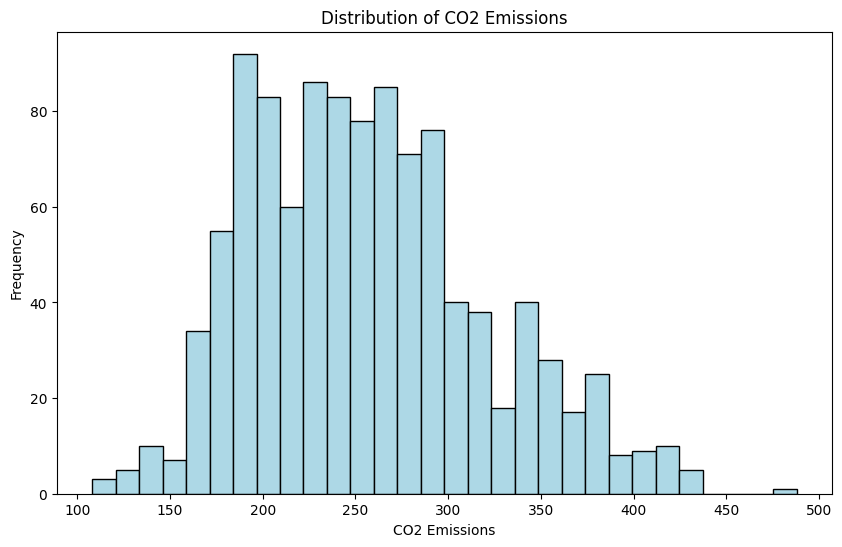

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(data['CO2EMISSIONS'], bins=30, color = "lightblue", ec="black")
plt.xlabel("CO2 Emissions")
plt.ylabel("Frequency")
plt.title("Distribution of CO2 Emissions")
plt.show()

# Plotting the box plot of CO2 Emissions

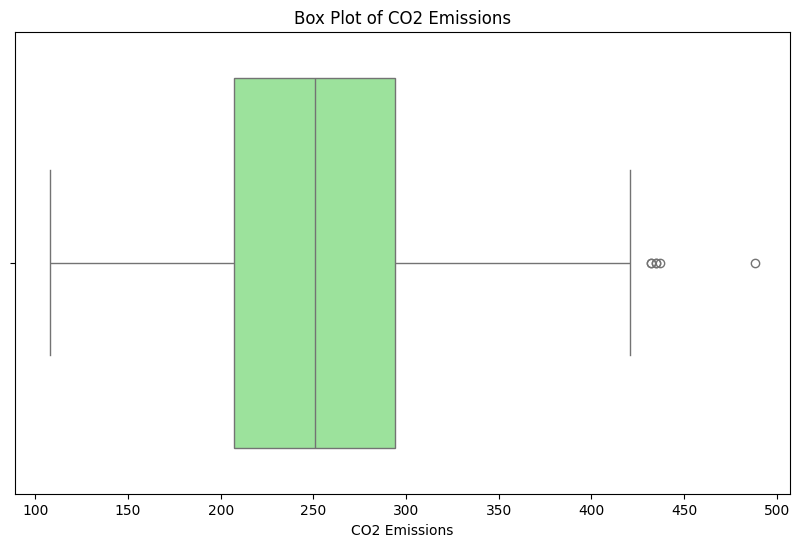

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['CO2EMISSIONS'], color='lightgreen')
plt.xlabel("CO2 Emissions")
plt.title("Box Plot of CO2 Emissions")
plt.show()

# Plotting pair plot of features and CO2 Emissions

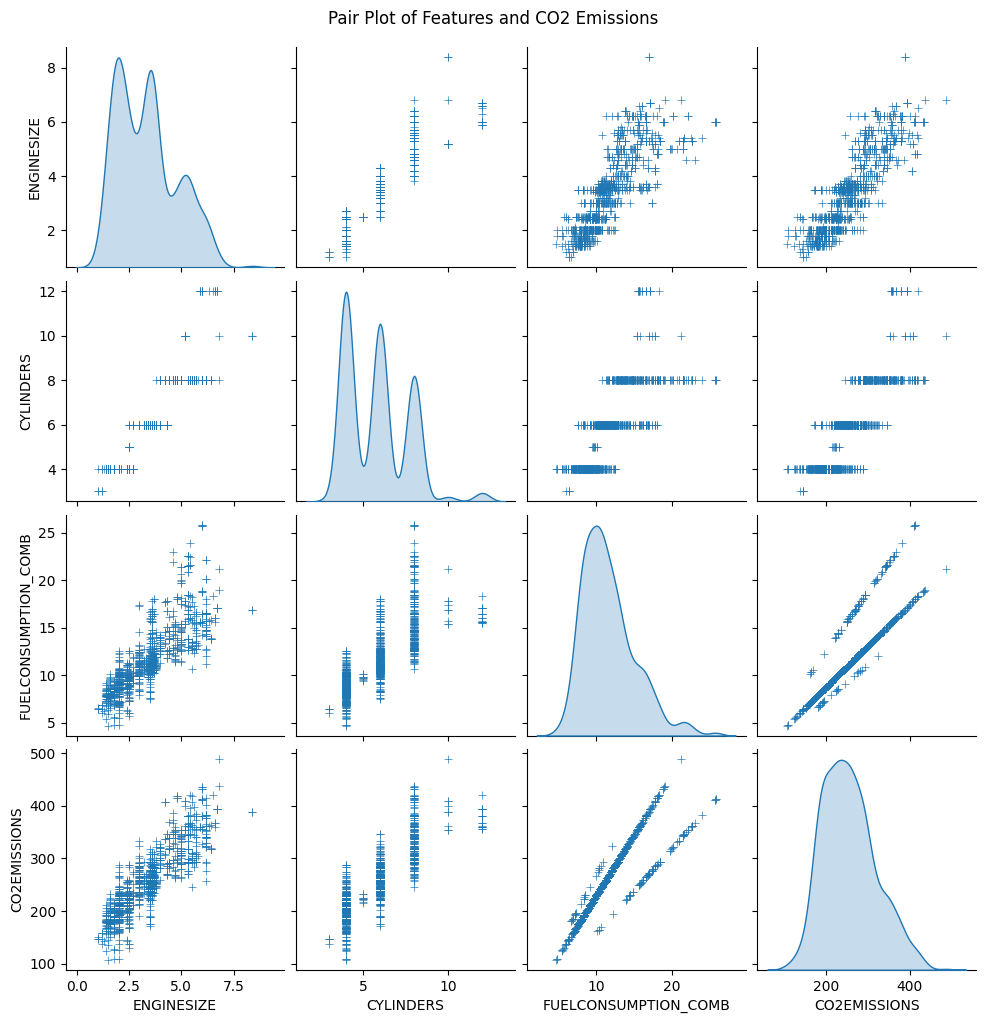

In [44]:
sns.pairplot(data, diag_kind='kde', markers='+')
plt.suptitle("Pair Plot of Features and CO2 Emissions", y=1.02)
plt.show()

# Plotting residuals

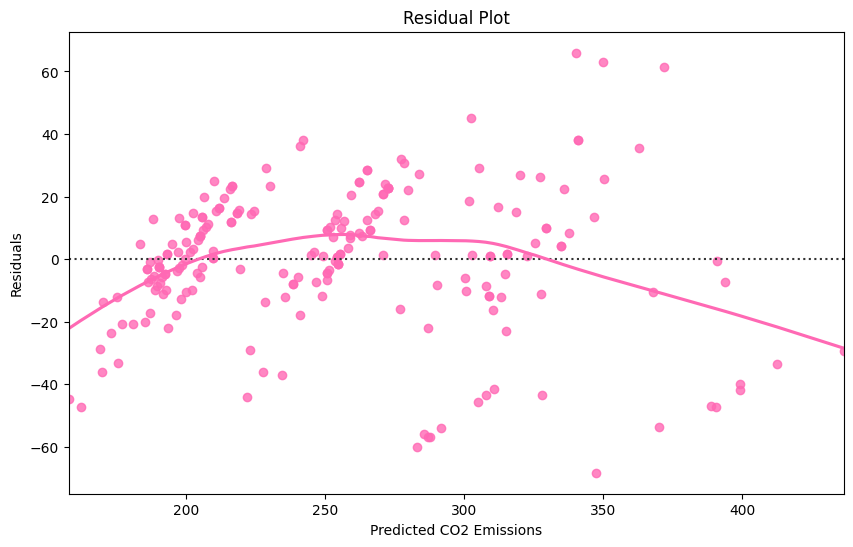

In [45]:
plt.figure(figsize=(10, 6))
sns.residplot(x=predictions, y=y_test - predictions, lowess=True, color='hotpink')
plt.xlabel("Predicted CO2 Emissions")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()